In [1]:
# Load EDA pkgs
import numpy as np
import pandas as pd

# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load ML tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.probability import FreqDist
from nltk.util import bigrams

#### <span style="color:#003049">Pasos a seguir:</span> 
<span style="color:#003049">
    <ul>
        <li><b>get the data</b></li>
        <li><b>delete index column</b></li>
        <li><b>Compare length of text real news vs fake news </b></li>
        <li><b>Comparing length of title, real news vs fake news</b></li>
        <li><b>average length of the texts for real and fake news and avg length of the titles for real and fake news</b></li>
        <li><b>encontrar the most repeated keywords in los textos de fake and real news</b></li>
        <li><b>to detect the most repeated keywords in los textos de fake and real news</b></li>
        <li><b>to detect the most repeated keywords in df_real'title'.</b></li>
        <li><b>add columns length_title and length_text</b></li>       
    </ul>
</span> 

In [2]:
df = pd.read_csv('../data/df_fake_news_without_steemming.csv')

In [3]:
df = df[df['text'].notnull()]
df = df.dropna()
df.reset_index(inplace=True)
#df = df.drop(axis=1, columns='level_0')
df.head(5)

,index,title,text,subject,date,category,length_text,length_title
0,0,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,News,2017-12-31,0,254,9
1,1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,2017-12-31,0,178,8
2,2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,News,2017-12-30,0,315,10
3,3,trump obsessed even obamas name coded website ...,christmas day donald trump announced back work...,News,2017-12-29,0,239,8
4,4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,2017-12-25,0,208,7


In [4]:
df = df.drop(axis=1, columns='index')
df.head(5)

,title,text,subject,date,category,length_text,length_title
0,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,News,2017-12-31,0,254,9
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,2017-12-31,0,178,8
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,News,2017-12-30,0,315,10
3,trump obsessed even obamas name coded website ...,christmas day donald trump announced back work...,News,2017-12-29,0,239,8
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,2017-12-25,0,208,7


### <span style="color:#003049">1. First I would like to compare the length of text and title of the real and fake news</span> 

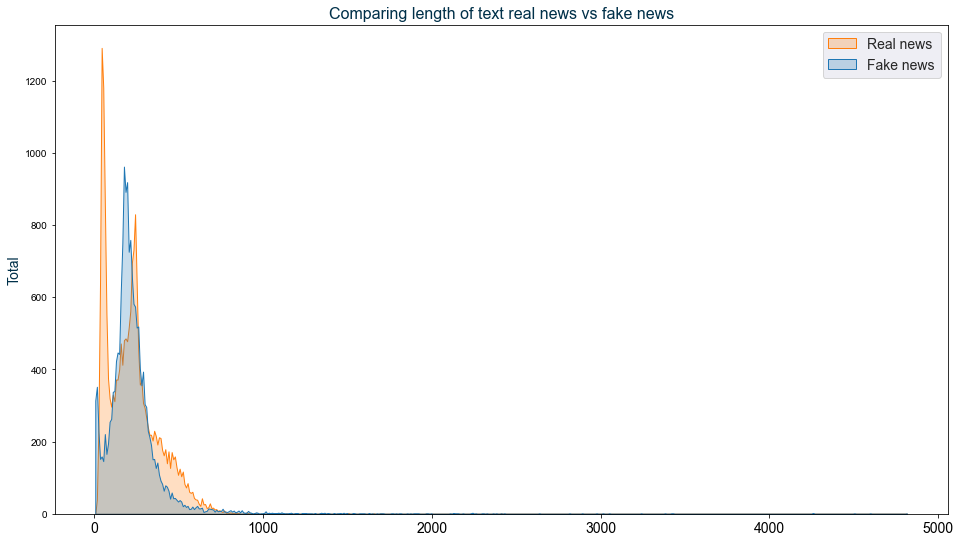

In [5]:
plt.figure(figsize=(16,9))
sns.histplot(x='length_text', data=df, hue='category', element="poly")
plt.title('Comparing length of text real news vs fake news', fontsize=16, color="#003049")
plt.ylabel('Total', fontsize=14, color="#003049")
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

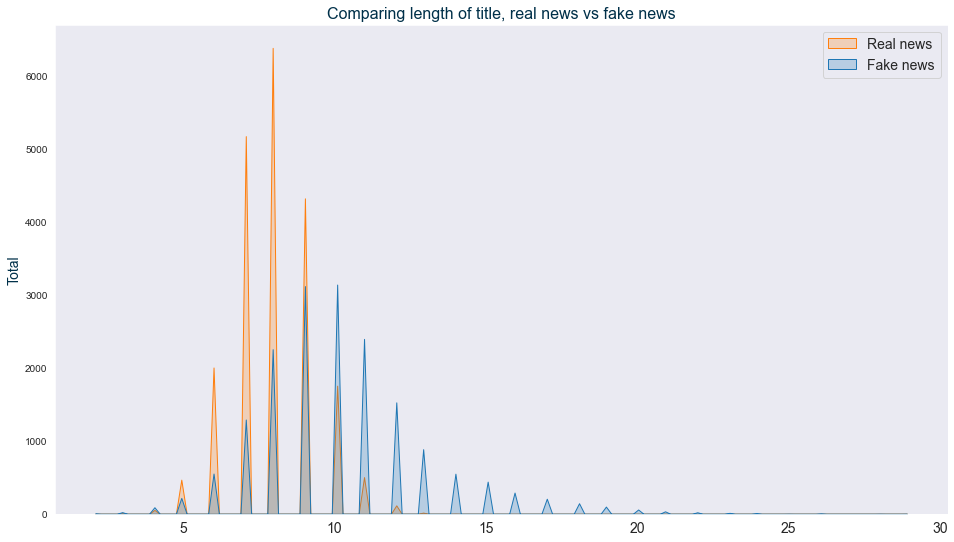

In [6]:
plt.figure(figsize=(16,9))
sns.histplot(x='length_title', data=df, hue='category', element="poly")
plt.title('Comparing length of title, real news vs fake news', fontsize=16, color="#003049")
plt.ylabel('Total', fontsize=14, color="#003049")
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

In [7]:
# Lets divide the dataframe in two dataframes again
df_real = df.loc[df["category"] == 1]
df_fake = df.loc[df["category"] == 0] 

In [8]:
# Lets see the average length of the texts for real and fake news
print("Average length of real news: ", round(df_real["length_text"].mean(),2))
print("Average length of fake news: ", round(df_fake["length_text"].mean(),2))
print('-'*38)
print("diff real news vs fake news:   ", round(df_real["length_text"].mean() - df_fake["length_text"].mean()),2)

Average length of real news:  222.69
Average length of fake news:  229.14
--------------------------------------
diff real news vs fake news:    -6 2


In [9]:
# Lets see the average length of the titles for real and fake news
print("Average length of real news:  ", round(df_real["length_title"].mean(),2))
print("Average length of fake news: ", round(df_fake["length_title"].mean(),2))
print('-'*38)
print("diff real news vs fake news:  ", round(df_real["length_title"].mean() - df_fake["length_title"].mean()),2)

Average length of real news:   7.95
Average length of fake news:  10.22
--------------------------------------
diff real news vs fake news:   -2 2


### <span style="color:#003049">2. splitting "text" and "title" to count the words</span> 

In [10]:
def split_words(news):
    news = news.split()
    return news 
df_real['text'] = df_real['text'].apply(split_words)
df_fake['text'] = df_fake['text'].apply(split_words)
df_real['title'] = df_real['title'].apply(split_words)
df_fake['title'] = df_fake['title'].apply(split_words)

In [11]:
# to detect the most repeated keywords in df_fake'text'
words = [wrd for x in df_fake['text'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_text_fake = Counter(words)
keywords_text_fake = pd.DataFrame.from_dict(keywords_text_fake, orient='index').reset_index()
keywords_text_fake = keywords_text_fake.sort_values(by=[0], ascending=False)
keywords_text_fake.columns = ['fake_word_text','count']
keywords_text_fake.head(10)

,fake_word_text,count
1,trump,63791
249,said,22884
83,people,20689
33,president,19146
21,one,17606
0,donald,14892
48,like,14002
488,obama,12679
246,clinton,12664
71,also,11280


In [12]:
# to detect the most repeated keywords in df_real'text'
words = [wrd for x in df_real['text'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_text_real = Counter(words)
keywords_text_real = pd.DataFrame.from_dict(keywords_text_real, orient='index').reset_index()
keywords_text_real = keywords_text_real.sort_values(by=[0], ascending=False)
keywords_text_real.columns = ['real_word_text','count']
keywords_text_real.head(10)

,real_word_text,count
100,said,96024
67,trump,40540
5,us,37249
65,president,24510
1186,state,18140
107,government,17424
138,states,16810
553,new,16287
97,house,15842
73,also,15415


In [13]:
# to detect the most repeated keywords in df_real'title'.
words = [wrd for x in df_real['title'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_titles_real = Counter(words)
keywords_titles_real = pd.DataFrame.from_dict(keywords_titles_real, orient='index').reset_index()
keywords_titles_real = keywords_titles_real.sort_values(by=[0], ascending=False)
keywords_titles_real.columns = ['real_word_title','count']
keywords_titles_real.head(10)

,real_word_title,count
29,trump,4543
0,us,3843
44,says,2898
38,house,1418
68,new,856
467,north,850
37,white,801
22,russia,774
468,korea,743
65,senate,732


In [14]:
# to detect the most repeated keywords in df_fake'title'.
words = [wrd for x in df_fake['title'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_titles_fake = Counter(words)
keywords_titles_fake = pd.DataFrame.from_dict(keywords_titles_fake, orient='index').reset_index()
keywords_titles_fake = keywords_titles_fake.sort_values(by=[0], ascending=False)
keywords_titles_fake.columns = ['fake_word_title','count']
keywords_titles_fake.head(10)

,fake_word_title,count
1,trump,5930
154,video,5827
75,watch,1506
143,trumps,1252
419,obama,1224
915,hillary,1157
368,president,745
0,donald,724
120,gop,685
936,clinton,668


In [15]:
print("Real news, total title words: ",  keywords_titles_real["count"].sum())
print("Fake news ,total title words: ",  keywords_titles_fake["count"].sum())
print('-'*38)
print("Diff real news vs fake news:  ", keywords_titles_real["count"].sum() - keywords_titles_fake["count"].sum())

Real news, total title words:  165618
Fake news ,total title words:  177774
--------------------------------------
Diff real news vs fake news:   -12156


In [16]:
print("Real news, average title words: ",  round(keywords_titles_real["count"].mean(),2))
print("Fake news, average title words: ",  round(keywords_titles_fake["count"].mean(),2))
print('-'*38)
print("Diff real news vs fake news:     ", round(keywords_titles_real["count"].mean() -keywords_titles_fake["count"].mean(),2))

Real news, average title words:  11.5
Fake news, average title words:  9.63
--------------------------------------
Diff real news vs fake news:      1.86


In [17]:
print("Real news, total text words: ",  keywords_text_real["count"].sum())
print("Fake news, total text words: ",  keywords_text_fake["count"].sum())
print('-'*38)
print("Diff real news vs fake news:  ", keywords_text_real["count"].sum()-keywords_text_fake["count"].sum())

Real news, total text words:  4636359
Fake news, total text words:  3985446
--------------------------------------
Diff real news vs fake news:   650913


In [18]:
print("Real news, average text words: ",  round(keywords_text_real["count"].mean(),2))
print("Fake news, average text words: ",  round(keywords_text_fake["count"].mean(),2))
print('-'*38)
print("Diff real news vs fake news:   ", round(keywords_text_real["count"].mean()- keywords_text_fake["count"].mean(),2))

Real news, average text words:  59.56
Fake news, average text words:  23.18
--------------------------------------
Diff real news vs fake news:    36.38


In [19]:
vocabulary_title_real= set()
for title in df_real["title"]:
    for word in title:
        if word not in vocabulary_title_real:
            vocabulary_title_real.add(word)
print("Number of uniques words in all real news titles:  ", len(vocabulary_title_real))
####################################
vocabulary_title_fake= set()
for title in df_fake["title"]:
    for word in title:
        if word not in vocabulary_title_fake:
            vocabulary_title_fake.add(word)
print("Number of uniques words in all fake news titles:  ", len(vocabulary_title_fake))
print('-'*60)
print("Diff real news vs fake news:                      ",len(vocabulary_title_real)- len(vocabulary_title_fake))

Number of uniques words in all real news titles:   14406
Number of uniques words in all fake news titles:   18454
------------------------------------------------------------
Diff real news vs fake news:                       -4048


In [53]:
vocabulary_text_real= set()
for text in df_real["text"]:
    for word in text:
        if word not in vocabulary_text_real:
            vocabulary_text_real.add(word)
print("Number of uniques words in all real news texts:  ", len(vocabulary_text_real))
####################################
vocabulary_text_fake= set()
for text in df_fake["text"]:
    for word in text:
        if word not in vocabulary_text_fake:
            vocabulary_text_fake.add(word)
print("Number of uniques words in all fake news texts: ", len(vocabulary_text_fake))
print('-'*60)
print("Diff real news vs fake news:                    ", len(vocabulary_text_real) - len(vocabulary_text_fake))
percentage = round(len(vocabulary_text_fake)/len(vocabulary_text_real)* 100,3)
print(f"fakes news have {percentage}% more uniques word than real news.")

Number of uniques words in all real news texts:   77843
Number of uniques words in all fake news texts:  171924
------------------------------------------------------------
Diff real news vs fake news:                     -94081
fakes news have 220.86% more uniques word than real news.


#### <span style="color:#003049">No como medio de analisis sino mas por lo visual voy a hacer un plot con las palabras mas frecuentas tanto en real como en fake news</span> 

<function matplotlib.pyplot.show(close=None, block=None)>

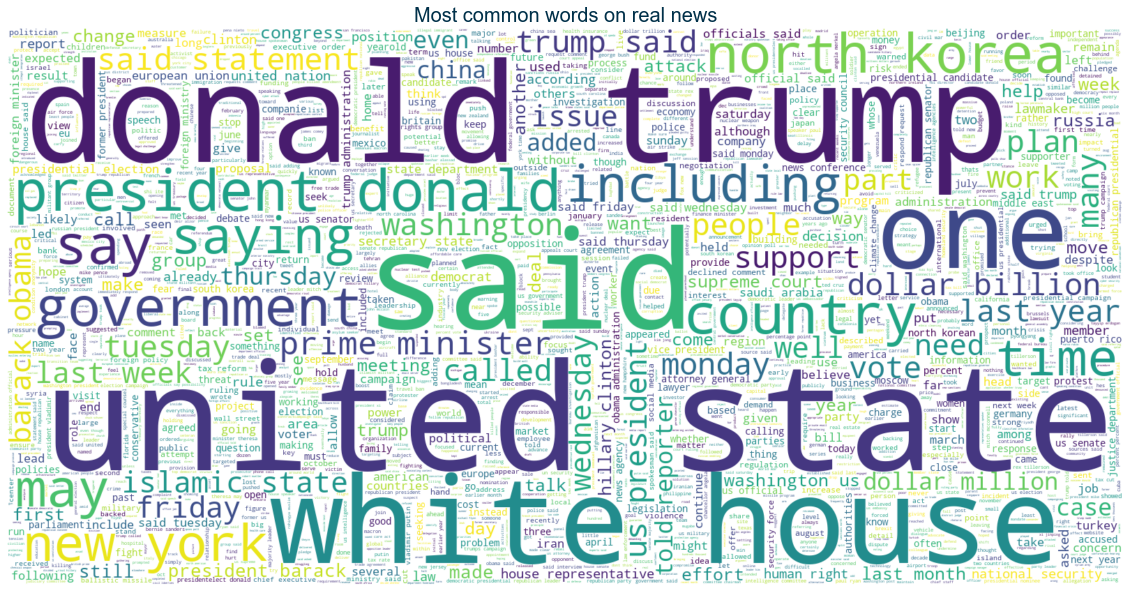

In [21]:
# Text from the real news articles
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS, background_color="white").generate(" ".join(df[df.category == 1].text))
plt.title('Most common words on real news', fontsize=20, color="#003049")
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

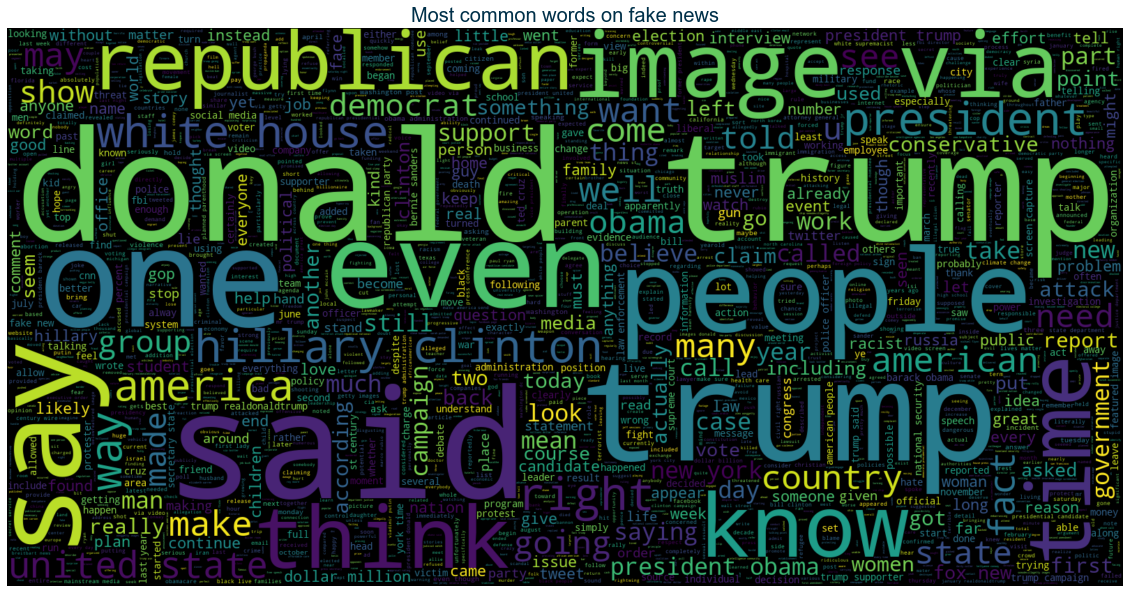

In [22]:
# Text from the fake news articles
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.title('Most common words on fake news', fontsize=20, color="#003049")
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

### <span style="color:#003049">veamos las uniones de dos palabras mas frecuentes</span> 

In [23]:
all_words = []
for i in df_real["text"]:
    all_words += i
all_words2 = [Counter(bigrams(all_words))]
bg_dict = dict(all_words2[0])
bg_dict_sorted = sorted(bg_dict.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))
bg_str = list(map(lambda x: ' '.join(x), bg))
d = {'two_word':bg_str,'count':counts}
bigrams_true_text = pd.DataFrame(d, columns=['two_word','count'])
bigrams_true_text.head(60)

,two_word,count
0,united states,11489
1,white house,7986
2,donald trump,7683
3,president donald,5649
4,north korea,4746
5,new york,4221
6,prime minister,3993
7,said statement,3811
8,dollar billion,3521
9,trump said,3295


In [24]:
all_words = []
for i in df_real["title"]:
    all_words += i
all_words2 = [Counter(bigrams(all_words))]
bg_dict = dict(all_words2[0])
bg_dict_sorted = sorted(bg_dict.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))
bg_str = list(map(lambda x: ' '.join(x), bg))
d = {'two_word':bg_str,'count':counts}
bigrams_true_title = pd.DataFrame(d, columns=['two_word','count'])
bigrams_true_title.head()

,two_word,count
0,white house,771
1,north korea,612
2,trump says,345
3,islamic state,226
4,supreme court,224


In [25]:
all_words = []
for i in df_fake["title"]:
    all_words += i
all_words2 = [Counter(bigrams(all_words))]
bg_dict = dict(all_words2[0])
bg_dict_sorted = sorted(bg_dict.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))
bg_str = list(map(lambda x: ' '.join(x), bg))
d = {'two_word':bg_str,'count':counts}
bigrams_fake_title = pd.DataFrame(d, columns=['two_word','count'])
bigrams_fake_title.head(60)

,two_word,count
0,donald trump,606
1,video watch,396
2,video trump,319
3,fox news,264
4,hillary clinton,250
5,white house,246
6,president trump,240
7,trump video,208
8,bernie sanders,193
9,ted cruz,187


In [26]:
all_words = []
for i in df_fake["text"]:
    all_words += i
all_words2 = [Counter(bigrams(all_words))]
bg_dict = dict(all_words2[0])
bg_dict_sorted = sorted(bg_dict.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))
bg_str = list(map(lambda x: ' '.join(x), bg))
d = {'two_word':bg_str,'count':counts}
bigrams_fake_text = pd.DataFrame(d, columns=['two_word','count'])
bigrams_fake_text.head(60)

,two_word,count
0,donald trump,13201
1,image via,6189
2,hillary clinton,4998
3,white house,4832
4,united states,4593
5,president obama,3223
6,new york,3036
7,fox news,2492
8,president trump,2394
9,dollar million,1911


In [27]:
# Saving dataframe as CSV
df.to_csv(f'../data/tableau_f_and_r.csv', index=False)

bigrams_true_text.to_csv(f'../data/bigrams_true_text.csv', index=False)
bigrams_true_title.to_csv(f'../data/bigrams_true_title.csv', index=False)
bigrams_fake_text.to_csv(f'../data/bigrams_fake_text.csv', index=False)
bigrams_fake_title.to_csv(f'../data/bigrams_fake_title.csv', index=False)
keywords_titles_fake.to_csv(f'../data/keywords_titles_fake.csv', index=False)
keywords_titles_fake.to_csv(f'../data/keywords_titles_fake.csv', index=False)
keywords_titles_real.to_csv(f'../data/keywords_titles_real.csv', index=False)
keywords_text_fake.to_csv(f'../data/keywords_text_fake.csv', index=False)
keywords_text_real.to_csv(f'../data/keywords_text_real.csv', index=False)